In [ ]:
# Import TensorFlow and Keras layers
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
# CIFAR-10 contains 60,000 32x32 color images in 10 classes

# Load the data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten labels (e.g., from [[6]] to [6])
y_train = y_train.flatten()
y_test = y_test.flatten()

# Display dataset shape
print("Training samples:", X_train.shape)
print("Test samples:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


In [ ]:
# Class names corresponding to CIFAR-10 labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


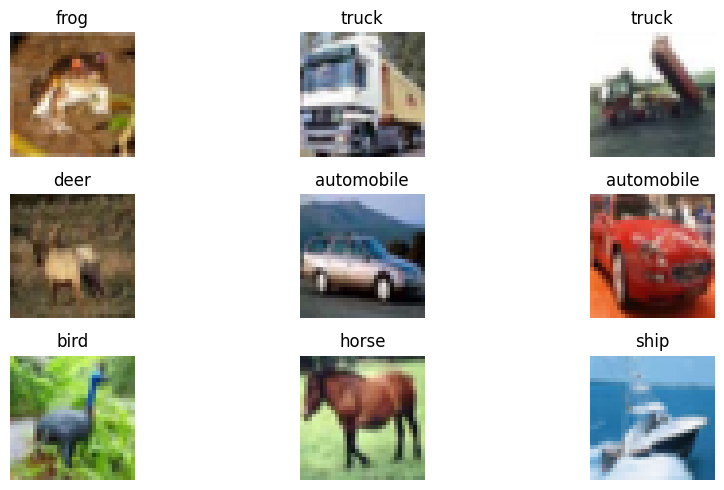

In [ ]:
# Display first 9 images with class labels
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Create a Sequential CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with optimizer, loss function, and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model on training data
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 82ms/step - accuracy: 0.3083 - loss: 1.8602 - val_accuracy: 0.4888 - val_loss: 1.4231
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.5075 - loss: 1.3616 - val_accuracy: 0.5437 - val_loss: 1.2840
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.5718 - loss: 1.2028 - val_accuracy: 0.5825 - val_loss: 1.1676
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.6161 - loss: 1.0911 - val_accuracy: 0.6257 - val_loss: 1.0718
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6546 - loss: 0.9863 - val_accuracy: 0.6129 - val_loss: 1.1160
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.6732 - loss: 0.9292 - val_accuracy: 0.6660 - val_loss: 0.9519
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.6968 - loss: 0.8619 - val_accuracy: 0.6650 - val_loss: 0.9499
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7099 - loss: 0.8281 - 

In [ ]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 3s - 10ms/step - accuracy: 0.6929 - loss: 0.8937
Test Accuracy: 69.29%


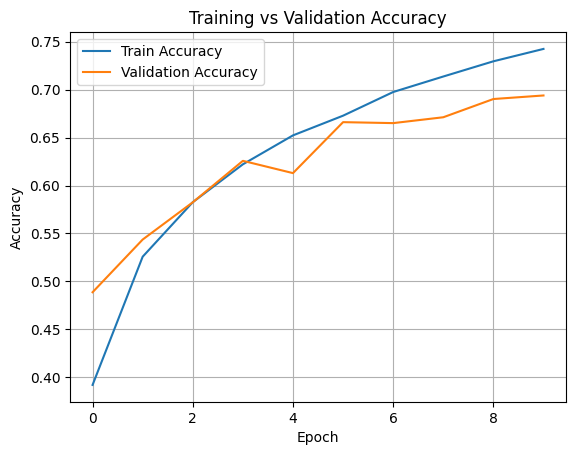

In [ ]:
# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


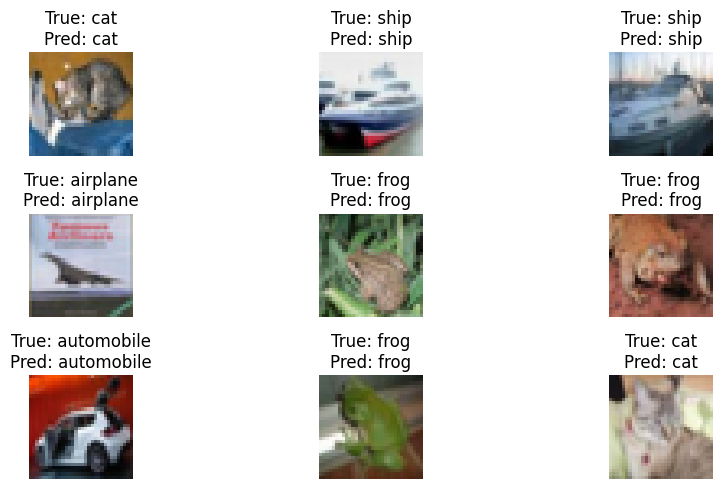

In [ ]:
# Predict class probabilities
predictions = model.predict(X_test)

# Convert to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Show a few predictions
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
